In [150]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os; import sys
sys.path.append('/home/mitch/school/mfl/src/')
import utils
import sys; sys.path.append('/home/mitch/util/python')

In [151]:
raw     = '/home/mitch/Dropbox/data/mexico_fls/raw/2005/'
processed = '/home/mitch/Dropbox/data/mexico_fls/processed2/'

figs    = '/home/mitch/school/mfl/fig/'
dicts   = '/home/mitch/school/mfl/notebooks/dicts/'

In [152]:
df = pd.read_csv(processed + 'data.csv')
df.head(10)

,hhid,hhmember,weight_ind,is_hhm,age,attended_school,education,gender,income_type,income_undetailed,...,hh_has_savings_credit_institution,hh_has_savings_batch,hh_has_savings_person_not_hhm,hh_has_savings_afores,hh_has_savings_solidarity,hh_has_savings_at_house,hh_has_savings_other,hh_has_debts_12mth,hh_debts_12mth,hh_has_savings
0,1000,1,2244.0,1.0,41.0,True,Medium,Male,dk,NaN,...,False,False,False,False,False,False,False,0.0,0.0,False
1,3000,1,2244.0,1.0,45.0,False,Low,Male,undetailed,6000.0,...,False,False,False,False,False,False,False,0.0,0.0,False
2,8000,1,2244.0,1.0,33.0,True,High,Male,undetailed,60000.0,...,True,False,False,False,False,False,False,1.0,15000.0,True
3,10000,1,2074.0,1.0,39.0,True,Low,Female,NaN,NaN,...,False,False,False,False,False,False,False,1.0,5000.0,False
4,11000,1,2074.0,1.0,29.0,True,Medium,Male,detailed,NaN,...,False,False,False,False,False,False,False,0.0,0.0,False
5,12000,1,2074.0,1.0,46.0,True,Low,Male,undetailed,48000.0,...,True,False,False,False,False,False,False,0.0,0.0,True
6,13000,1,2074.0,1.0,57.0,False,Low,Female,NaN,NaN,...,False,False,False,False,False,False,False,0.0,0.0,False
7,16000,1,2074.0,1.0,44.0,True,Low,Female,NaN,NaN,...,False,False,False,False,False,False,False,0.0,0.0,False
8,19000,1,1251.0,1.0,48.0,True,Low,Male,undetailed,64000.0,...,False,False,False,False,False,False,False,1.0,8000.0,False
9,21000,1,1251.0,1.0,34.0,True,Medium,Male,undetailed,36000.0,...,False,False,False,False,False,False,False,1.0,140000.0,False


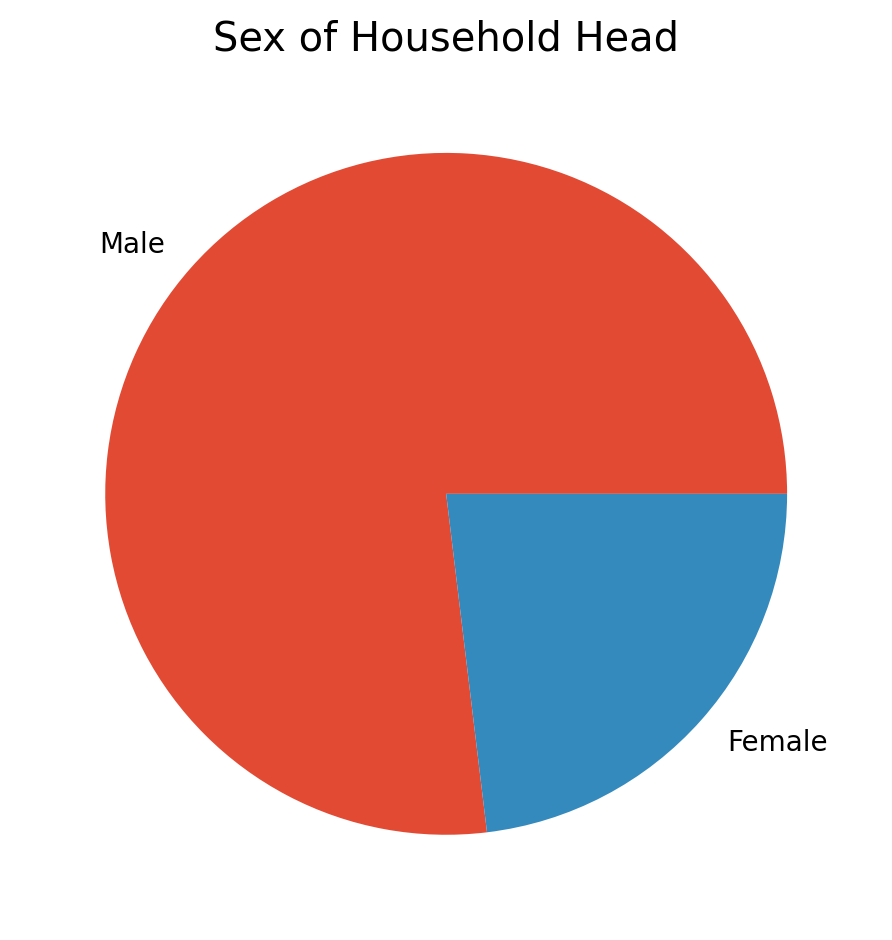

In [153]:
plt.clf()
gender = df.gender.value_counts()
plt.pie(gender, labels=[x.title() for x in gender.index])
plt.title('Sex of Household Head')
plt.show()

# Education

/tmp/ipykernel_378216/2366649531.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low', 'Medium', 'High'])


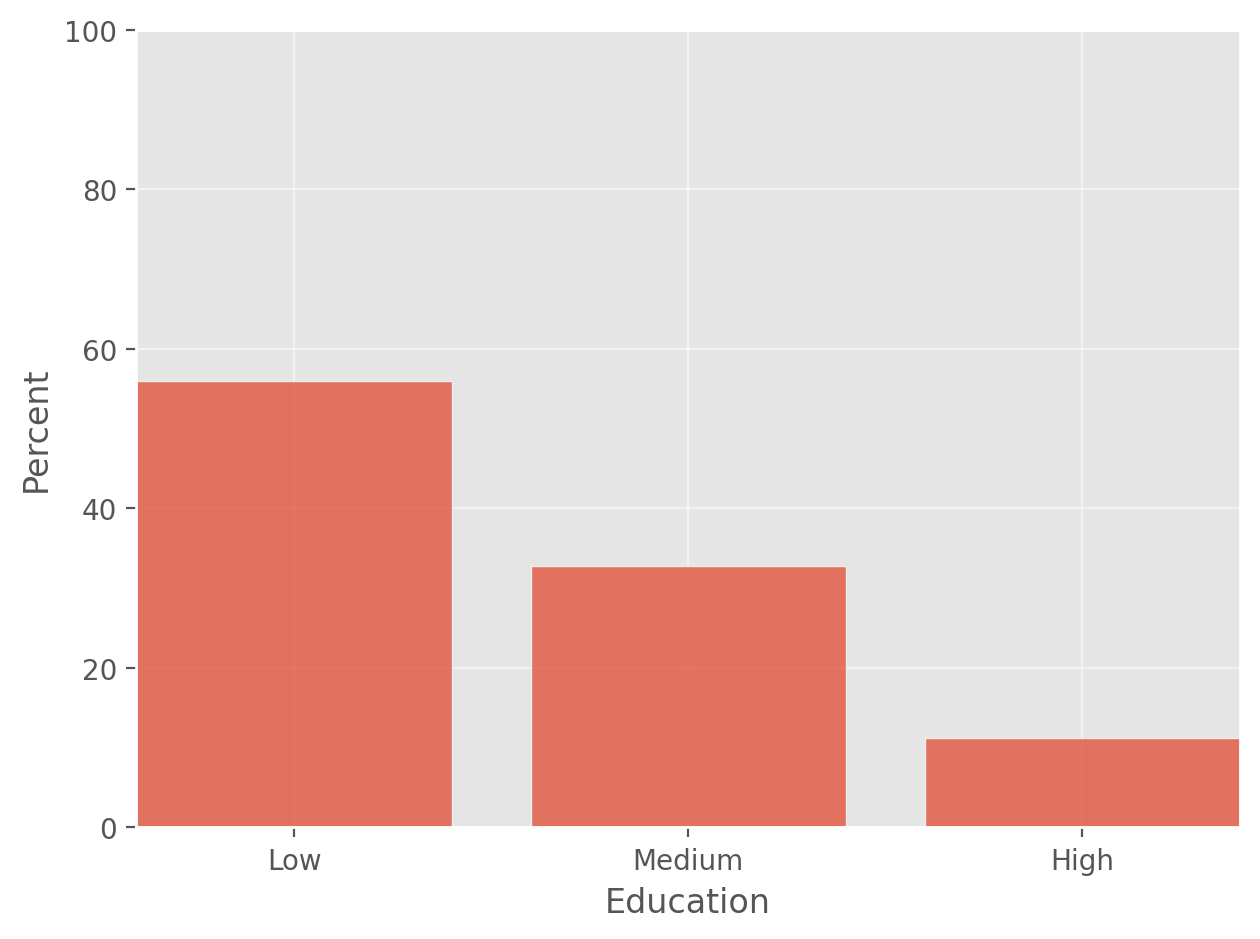

In [154]:
df['education'] = pd.Categorical(df['education'], ['Low', 'Medium', 'High'])
plt.clf()
ax = sns.histplot(df, x='education',
                  weights='weight_hh',
                  shrink=0.8,
                  stat='percent'
                  )
ax.set_xlabel('Education')
ax.set_xticklabels(['Low', 'Medium', 'High'])

ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

plt.show()

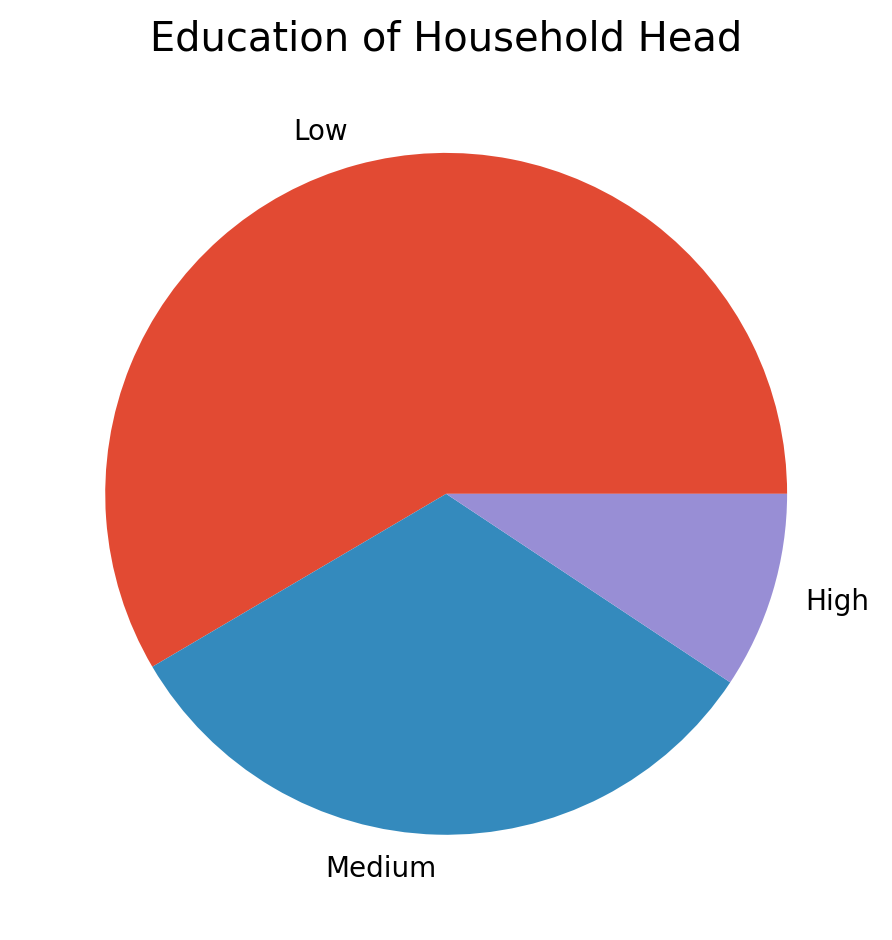

In [155]:
plt.clf()
education = df.education.value_counts()
plt.pie(education, labels=[x.title() for x in education.index])
plt.title('Education of Household Head')
plt.show()

# Interaction: Education and Sex of Household Head

In [156]:
education_by_sex = 100 * pd.crosstab(df.education, df.gender, df.weight_hh, aggfunc='sum', normalize='index')
education_by_sex.reset_index(inplace=True)
education_by_sex

gender,education,Female,Male
0,Low,28.286769,71.713231
1,Medium,20.117435,79.882565
2,High,18.447207,81.552793


In [157]:
education_by_sex = education_by_sex.melt(id_vars='education', value_name='Percent')
education_by_sex

,education,gender,Percent
0,Low,Female,28.286769
1,Medium,Female,20.117435
2,High,Female,18.447207
3,Low,Male,71.713231
4,Medium,Male,79.882565
5,High,Male,81.552793


Text(0.5, 1.0, 'Education and Sex')

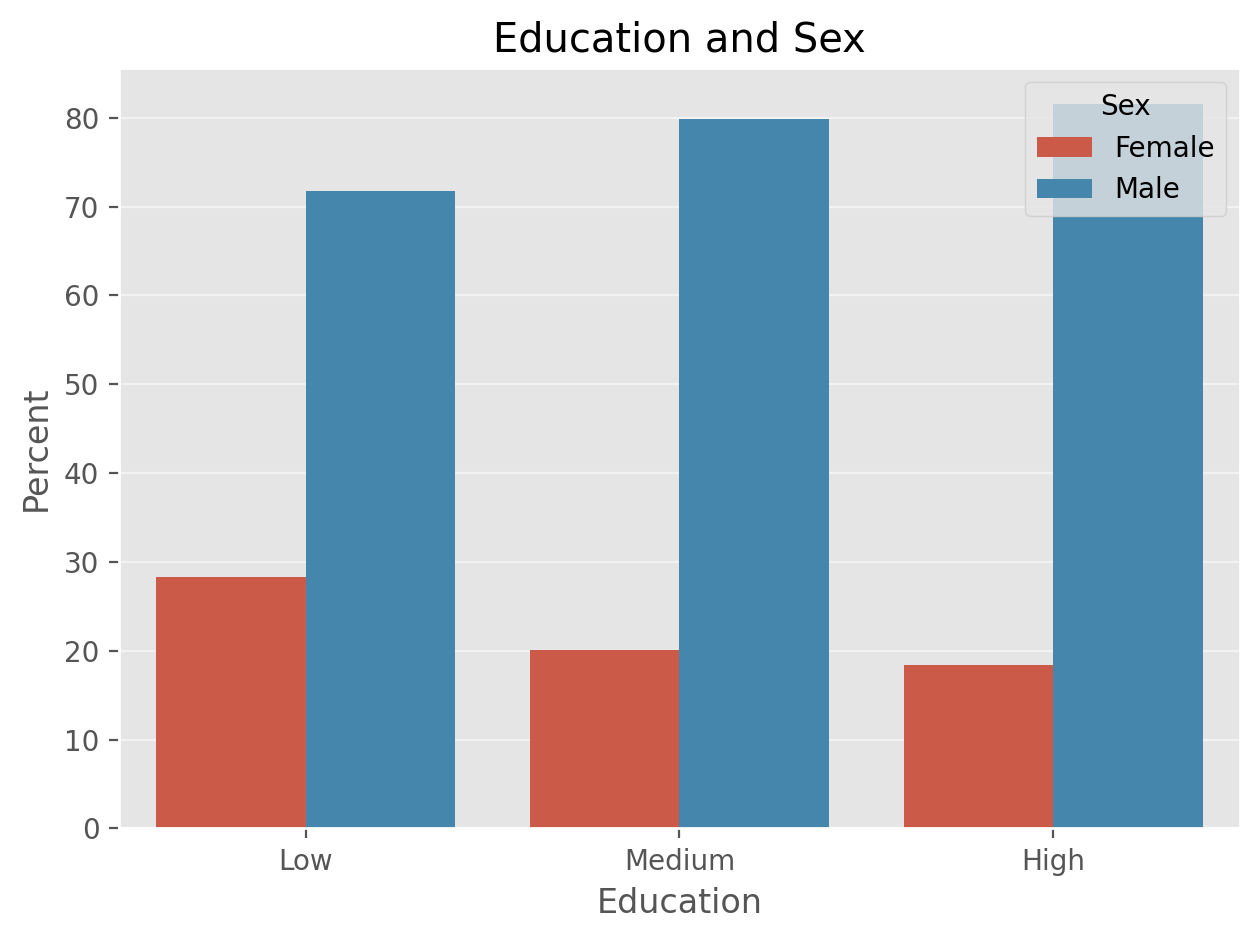

In [158]:
sns.barplot(education_by_sex, x='education', y='Percent', hue='gender')
plt.xlabel('Education')
plt.legend(title='Sex')
plt.title('Education and Sex')

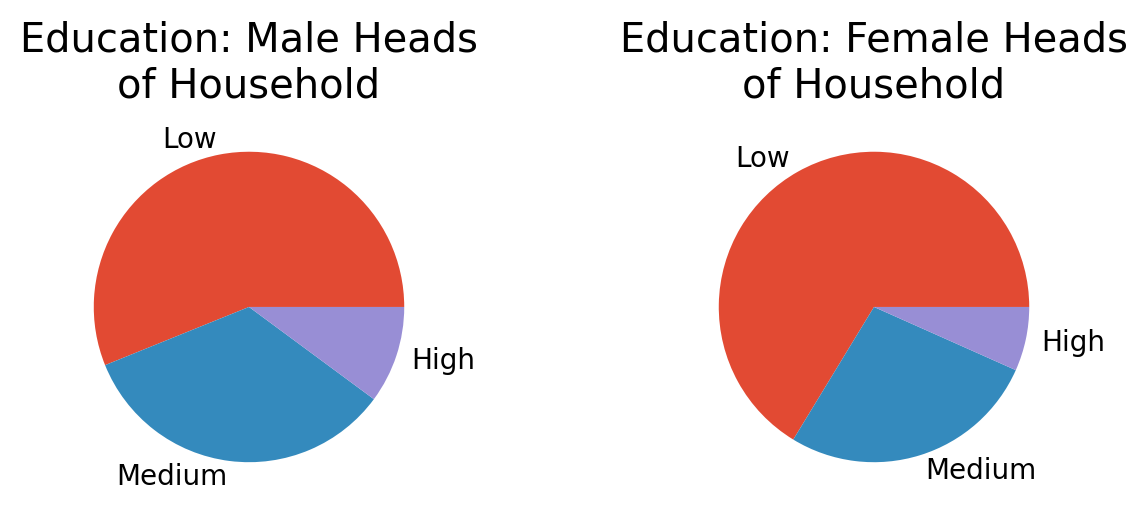

In [159]:
plt.clf()

plt.subplot(221)
male = df.query("gender == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index])
plt.title('Education: Male Heads\nof Household')

plt.subplot(222)
female = df.query("gender == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index])
plt.title('Education: Female Heads\nof Household')

plt.show()

# Location

In [160]:
percent = 100 * df.groupby('state')['weight_hh'].apply(np.sum) / df.weight_hh.sum()
percent = percent.sort_values(ascending=False)
percent

state
State of Mexico        12.069957
Veravruz               10.267100
Jalisco                 9.426697
Michoacan               8.486809
Oaxaca                  7.580478
Morelos                 7.246227
Puebla                  6.987309
Nuevo Leon              5.585715
Guanajuato              5.579919
Federal District        5.481976
Yucatan                 4.668900
Coahuila                4.616131
Durango                 3.363125
Sinaloa                 3.259754
Sonora                  2.764533
Baja California Sur     2.615370
Name: weight_hh, dtype: float64

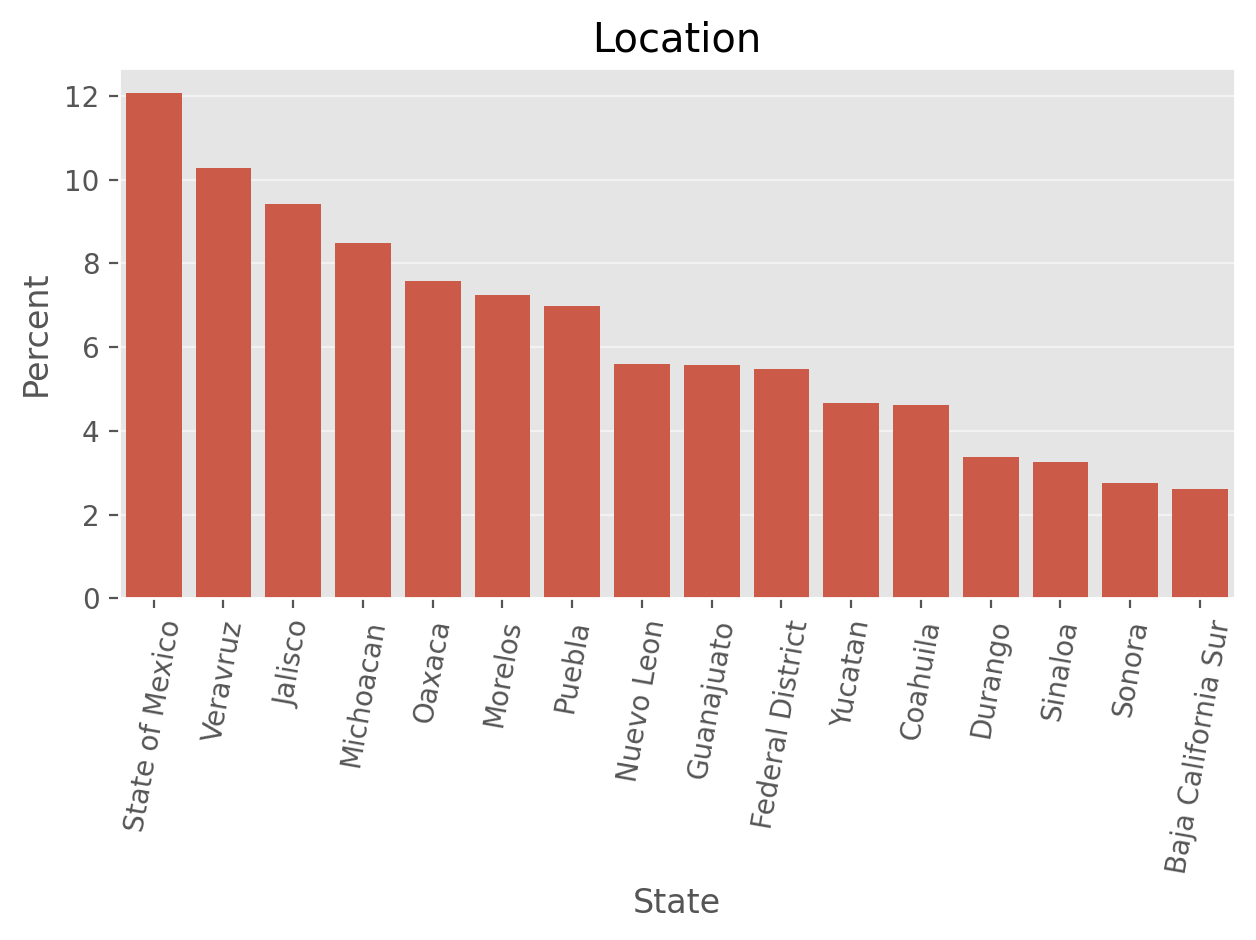

In [161]:
plt.clf()
sns.barplot(x=percent.index, y=percent.values)
plt.xticks(rotation=80)
plt.xlabel('State')
plt.ylabel('Percent')
plt.title('Location')
plt.show()

In [162]:
state_by_education = 100 * pd.crosstab(df.state, df.education, df.weight_hh, aggfunc='sum', normalize='index')
state_by_education

education,Low,Medium,High
state,,,
Baja California Sur,39.517001,46.524466,13.958533
Coahuila,34.546522,47.726447,17.727030
Durango,58.882052,29.266961,11.850986
Federal District,36.032979,37.586272,26.380748
Guanajuato,69.894693,26.578759,3.526548
Jalisco,51.639901,34.090940,14.269158
Michoacan,65.248815,27.299692,7.451494
Morelos,36.861874,42.976957,20.161169
Nuevo Leon,50.678347,40.693687,8.627967


In [163]:
melted = state_by_education.reset_index().sort_values('Low', ascending=False).melt(id_vars='state', value_name='Percent')

Text(0.5, 0, 'State')

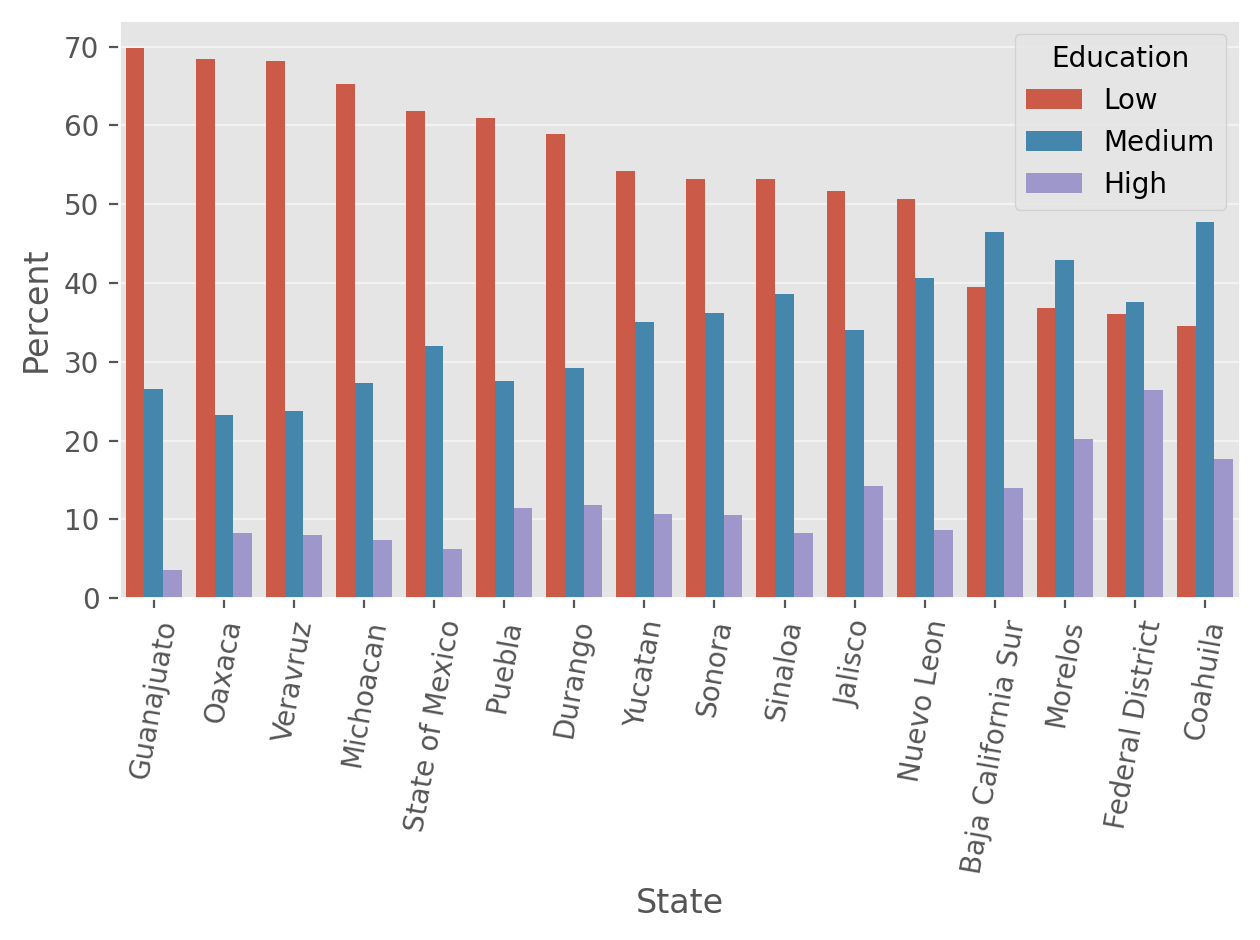

In [164]:
sns.barplot(melted, x='state', y='Percent', hue='education')
plt.legend(title='Education')
plt.xticks(rotation=80)
plt.xlabel('State')

# Savings 

In [165]:
hh_savings = [x for x in df.columns if 'hh_has_savings' in x]

def weighted_mean(df, x, weight='weight_hh'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    
hh_savings_mean = pd.DataFrame(
    index = hh_savings
)
hh_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in hh_savings]
hh_savings_mean.sort_values('mean', ascending=False)

,mean
hh_has_savings,14.620122
hh_has_savings_bank,8.737721
hh_has_savings_credit_institution,3.176151
hh_has_savings_at_house,1.557710
hh_has_savings_other,0.784421
hh_has_savings_cooperative,0.450041
hh_has_savings_afores,0.159812
hh_has_savings_batch,0.156085
hh_has_savings_solidarity,0.099687
hh_has_savings_person_not_hhm,0.063583


In [166]:
ind_savings = [x for x in df.columns if 'has_savings' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

ind_savings_mean = pd.DataFrame(
    index = ind_savings
)
ind_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in ind_savings]
ind_savings_mean.sort_values('mean', ascending=False)

,mean
has_savings,22.038016
hh_has_savings,14.675707
has_savings_bank,10.312561
hh_has_savings_bank,8.797487
has_savings_savingsbank,5.395042
has_savings_house,5.035684
hh_has_savings_credit_institution,3.177295
hh_has_savings_at_house,1.551974
has_savings_coop,1.266201
has_savings_none,0.928737


In [167]:
own = [x for x in df.columns if 'own' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

own_mean = pd.DataFrame(
    index = own
)
own_mean['mean'] = [100 * weighted_mean(df, x) for x in own]
own_mean = own_mean.sort_values('mean', ascending=False)

/tmp/ipykernel_378216/1481352814.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


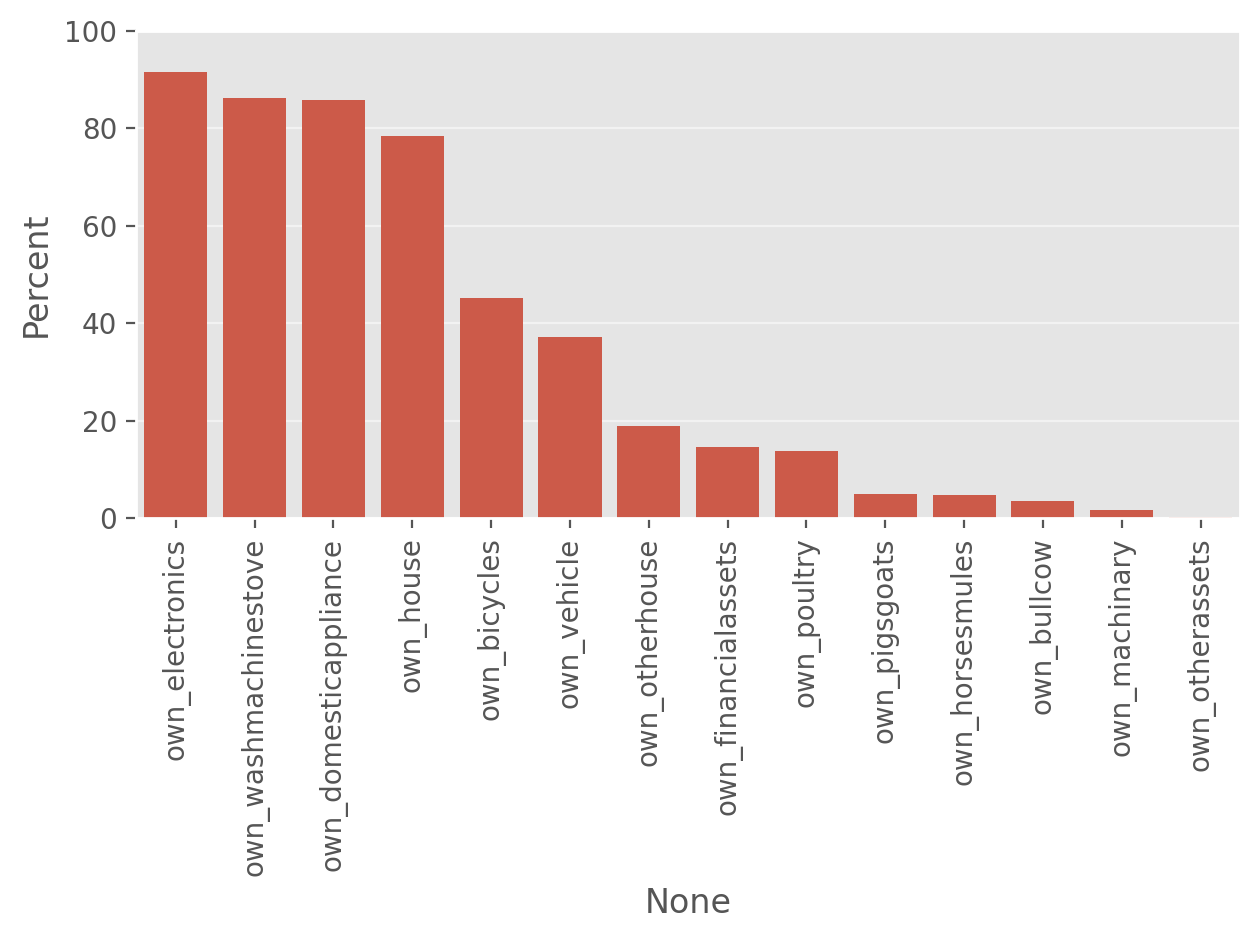

In [168]:
own_mean
plt.clf()
ax = sns.barplot(own_mean, x=own_mean.index, y='mean')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_ylim(0, 100)
ax.set_ylabel('Percent')

plt.show()

# Age

In [169]:
agebins = np.arange(20, 70, 5)
df['age_bin'] = pd.cut(df.age, agebins)

df['age'].describe()

count    5063.000000
mean       45.740470
std        10.679807
min        20.000000
25%        37.000000
50%        46.000000
75%        54.000000
max        65.000000
Name: age, dtype: float64

In [170]:
sizes = 100 * df.groupby('age_bin')['weight_hh'].sum() / df['weight_hh'].sum()
sizes = sizes.reset_index()
age_bin_labels = sizes.age_bin.apply(lambda x : str(x.left + 1) + ' - ' + str(x.right))
sizes

/tmp/ipykernel_378216/1791509885.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sizes = 100 * df.groupby('age_bin')['weight_hh'].sum() / df['weight_hh'].sum()


,age_bin,weight_hh
0,"(20, 25]",1.858533
1,"(25, 30]",6.718862
2,"(30, 35]",13.156046
3,"(35, 40]",14.123016
4,"(40, 45]",15.334423
5,"(45, 50]",14.594221
6,"(50, 55]",12.264092
7,"(55, 60]",12.418561
8,"(60, 65]",9.327781


/tmp/ipykernel_378216/1045375391.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_bin_labels, rotation=45)


Text(0.5, 1.0, 'Age of Household Head')

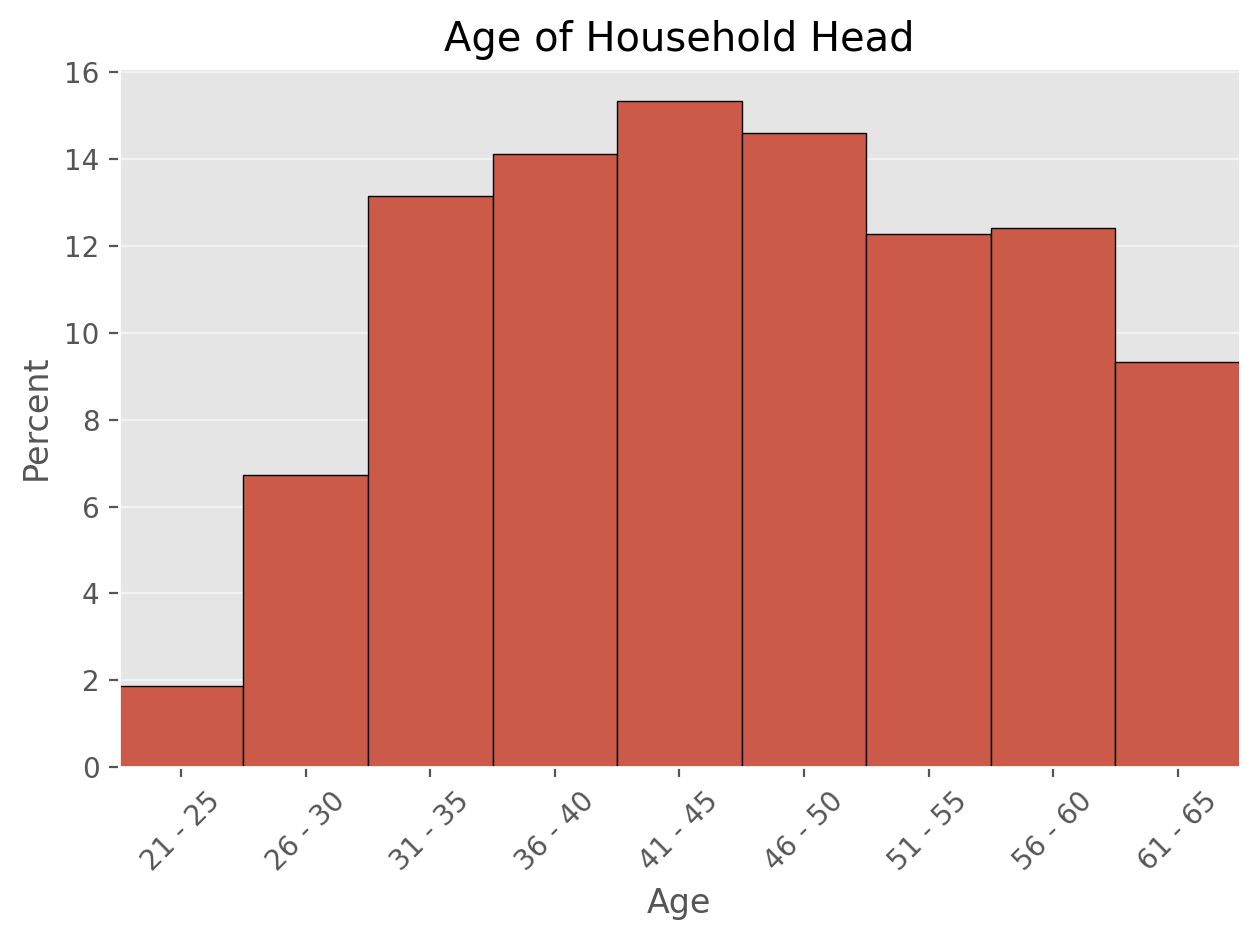

In [171]:
ax = sns.barplot(x=sizes.age_bin, y=sizes.weight_hh, width=1.0, edgecolor='black')
ax.set_xticklabels(age_bin_labels, rotation=45)
ax.set_ylabel('Percent')
ax.set_xlabel('Age')
ax.set_title('Age of Household Head')


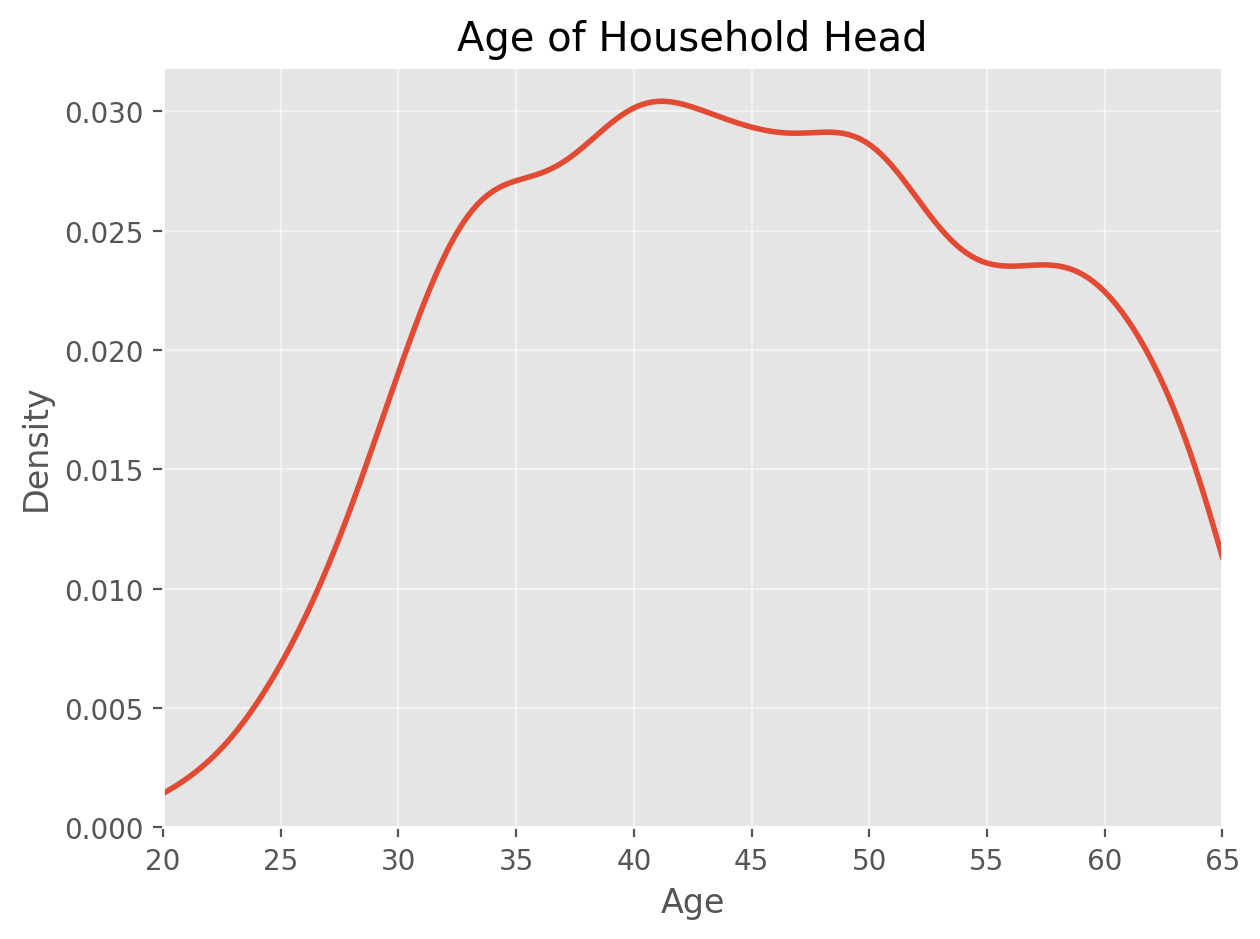

In [172]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight_hh',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age')
plt.title('Age of Household Head')
plt.show()

In [173]:
crosstab = 100 * pd.crosstab(df.age_bin, df.education, df.weight_hh, aggfunc='sum', normalize='index')
crosstab.reset_index(inplace=True)
crosstab

education,age_bin,Low,Medium,High
0,"(20, 25]",29.492638,61.326313,9.181049
1,"(25, 30]",40.331679,51.421789,8.246531
2,"(30, 35]",34.667030,55.318735,10.014235
3,"(35, 40]",41.940644,44.816464,13.242892
4,"(40, 45]",49.739954,33.615111,16.644935
5,"(45, 50]",60.601382,26.571810,12.826809
6,"(50, 55]",68.366024,21.300805,10.333171
7,"(55, 60]",77.922873,13.390873,8.686254
8,"(60, 65]",82.389476,12.228402,5.382122


In [174]:
age_by_education = crosstab.melt(id_vars='age_bin', value_name='Percent')
age_by_education

,age_bin,education,Percent
0,"(20, 25]",Low,29.492638
1,"(25, 30]",Low,40.331679
2,"(30, 35]",Low,34.667030
3,"(35, 40]",Low,41.940644
4,"(40, 45]",Low,49.739954
5,"(45, 50]",Low,60.601382
6,"(50, 55]",Low,68.366024
7,"(55, 60]",Low,77.922873
8,"(60, 65]",Low,82.389476
9,"(20, 25]",Medium,61.326313


/tmp/ipykernel_378216/3375914135.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_bin_labels)


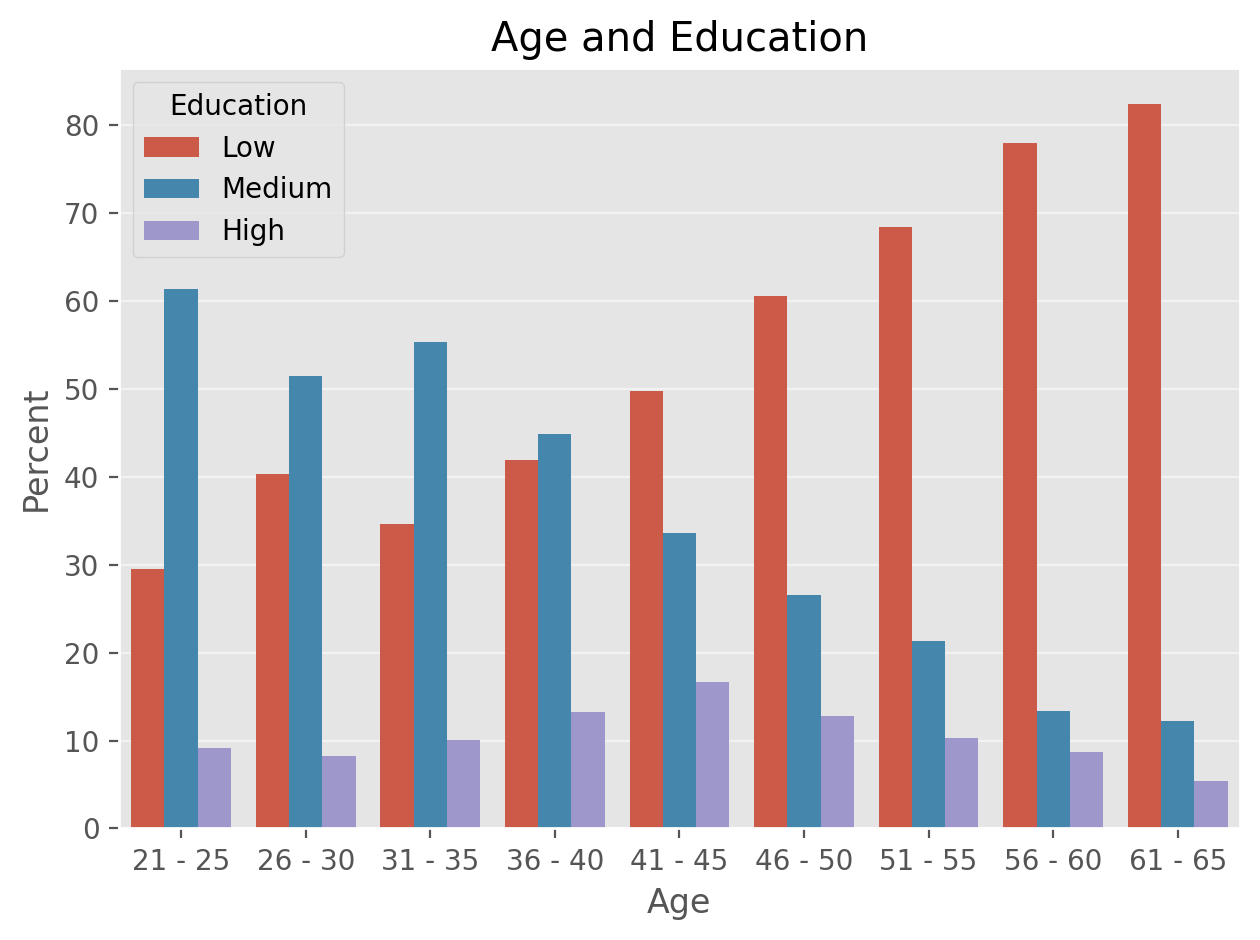

In [175]:
ax = sns.barplot(age_by_education, x='age_bin', y='Percent', hue='education')
ax.set_xticklabels(age_bin_labels)
ax.set_xlabel('Age')
ax.set_title('Age and Education')
ax.legend(title='Education')

# Income

<Figure size 1280x960 with 0 Axes>

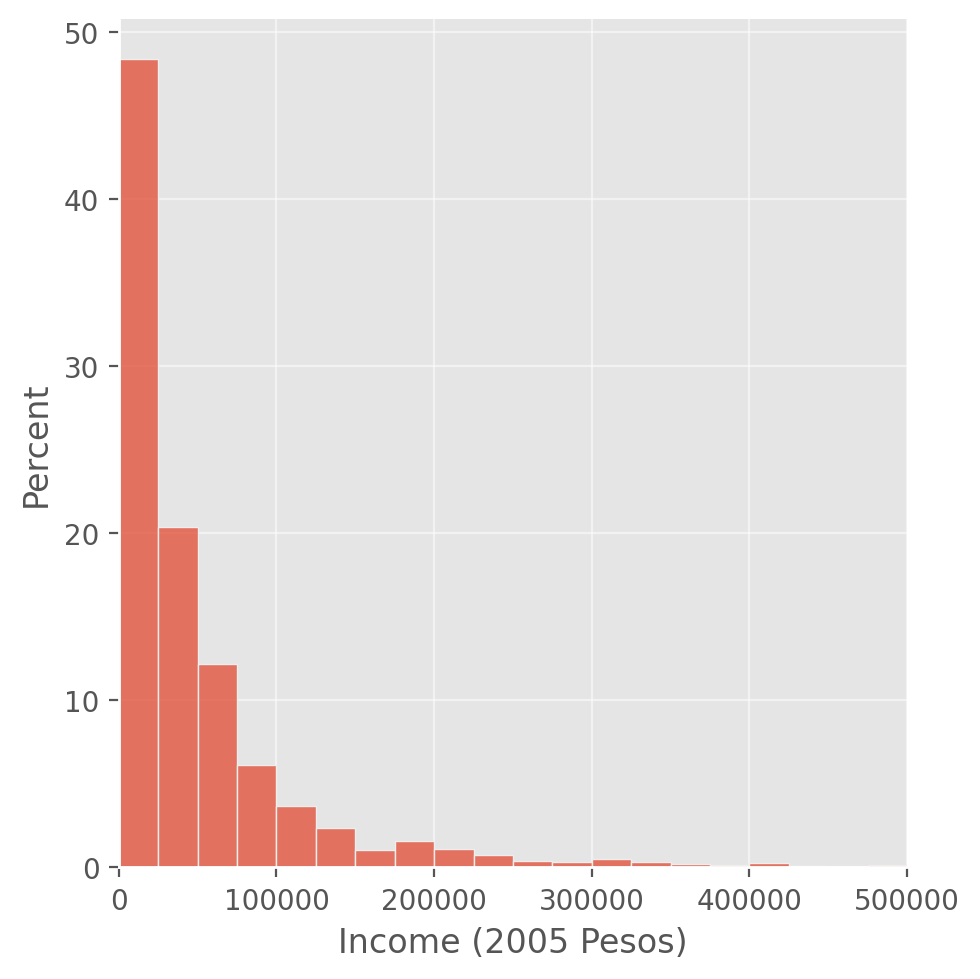

In [176]:
plt.clf()
sns.displot(df,
            x='income',
            weights='weight_hh',
            stat='percent',
            bins=20
            )
plt.xlabel('Income (2005 Pesos)')
plt.show()

<Figure size 1280x960 with 0 Axes>

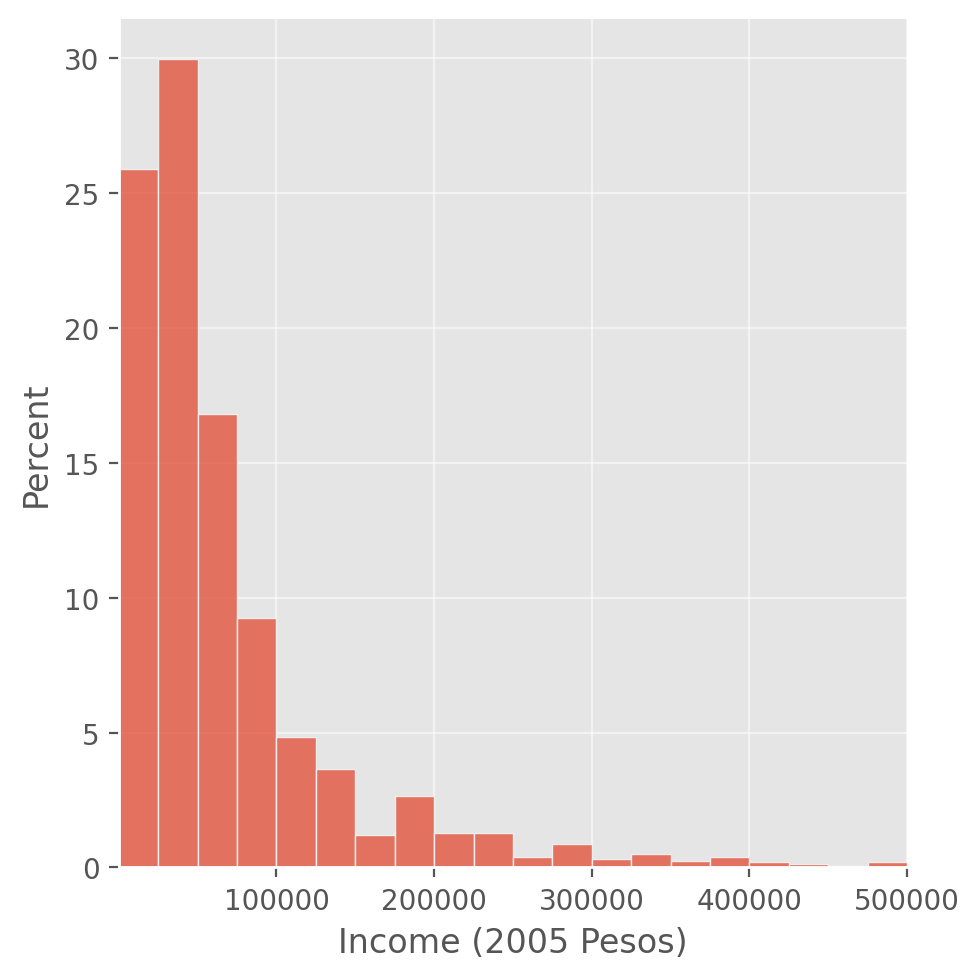

In [177]:
plt.clf()
sns.displot(df.query('income > 0'),
            x='income',
            weights='weight_hh',
            stat='percent', 
            bins=20)
plt.xlabel('Income (2005 Pesos)')
plt.show()

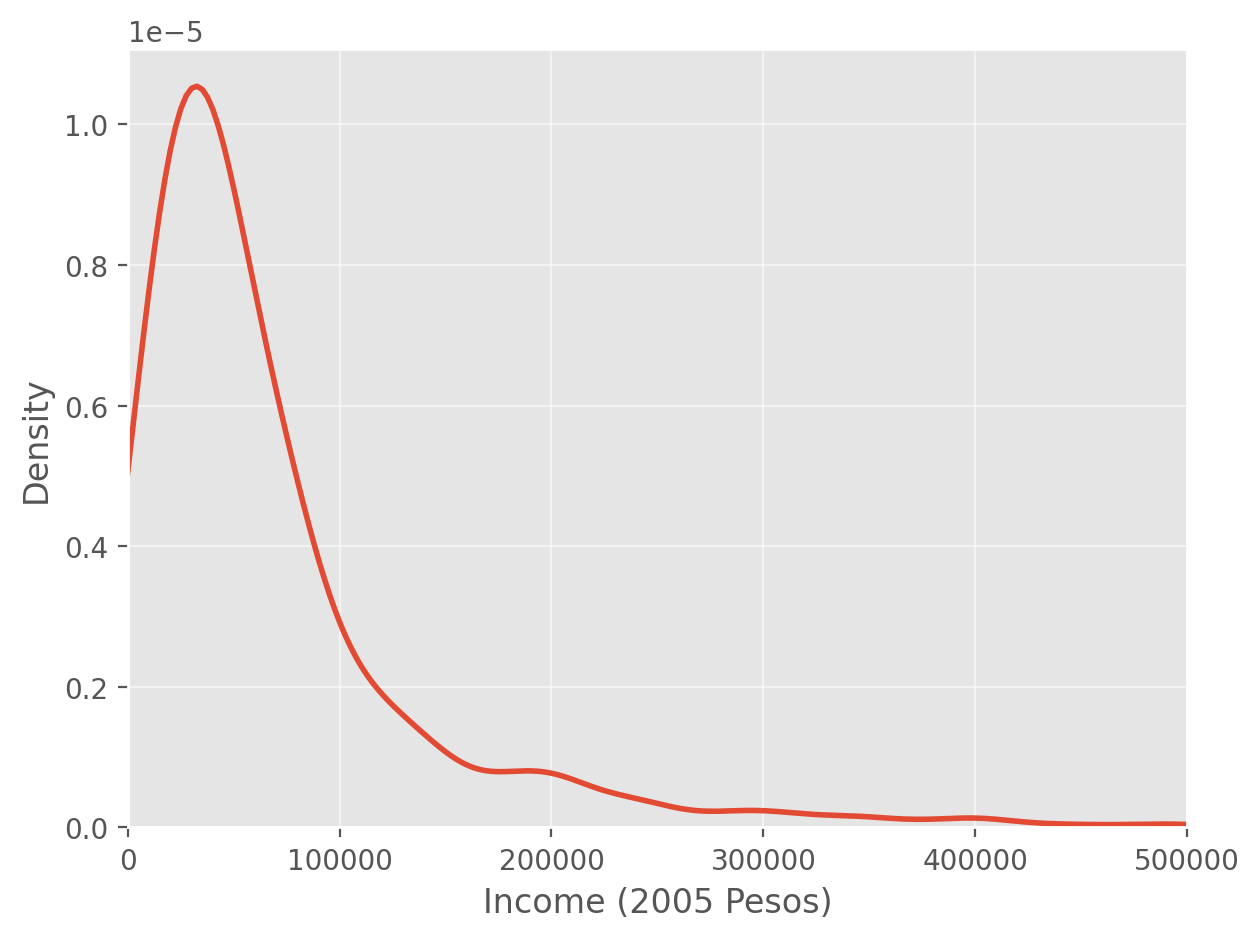

In [178]:
plt.clf()
sns.kdeplot(df.query('income > 0'),
            x='income',
            weights='weight_ind', 
            clip=(0.00, df.income.max()))
plt.xlabel('Income (2005 Pesos)')
plt.show()

<Figure size 1280x960 with 0 Axes>

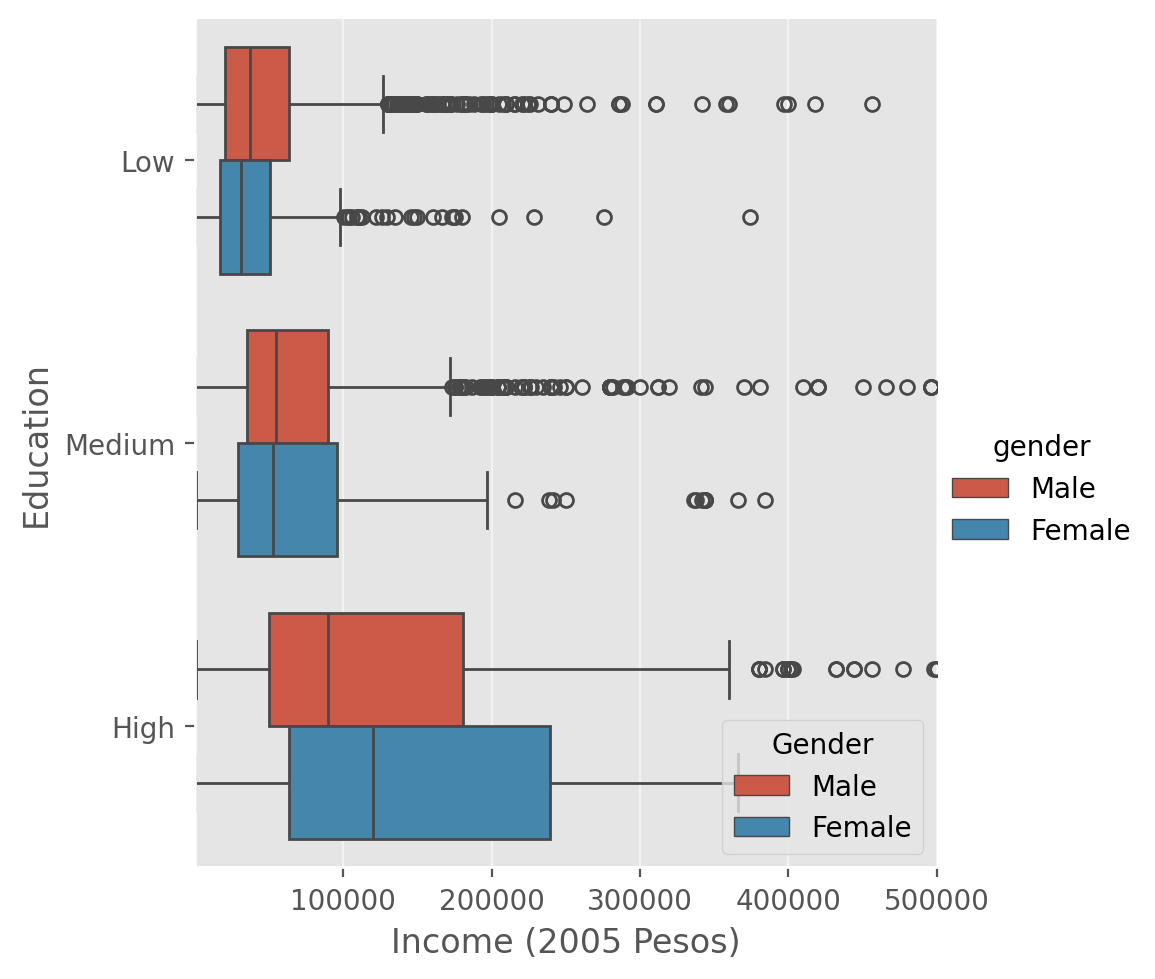

In [179]:
plt.clf()
sns.catplot(df.query('income > 0'), x='income', y='education', hue='gender', kind='box', orient='h')
plt.ylabel('Education')
plt.xlabel('Income (2005 Pesos)')
plt.legend(title='Gender')
plt.show()

<Figure size 1280x960 with 0 Axes>

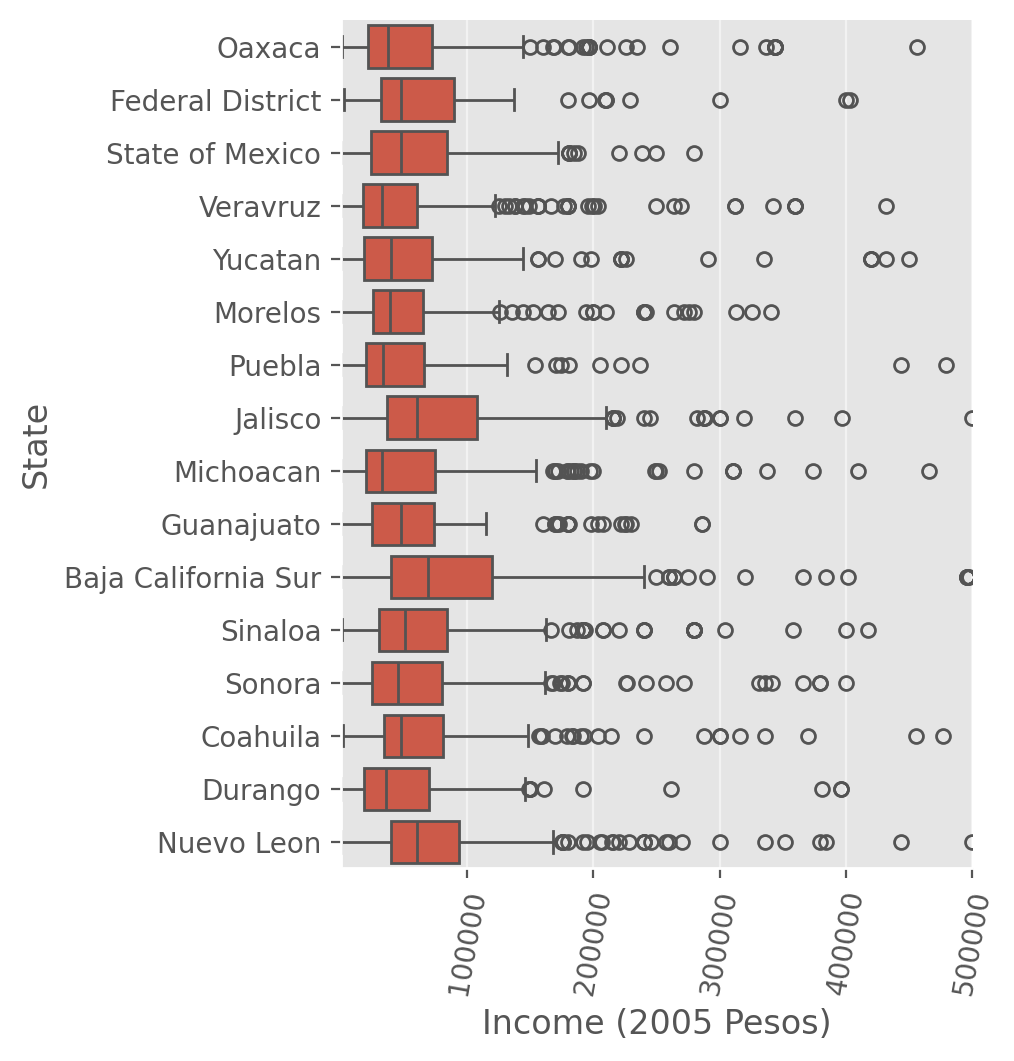

In [180]:
plt.clf()
sns.catplot(df.query('income > 0'), x='income', y='state', kind='box', orient='h')
plt.xticks(rotation=80)

plt.ylabel('State')
plt.xlabel('Income (2005 Pesos)')
plt.show()